In [102]:
# coding=utf-8
import random, timeit, sys
import pandas as pd

sys.setrecursionlimit(1<<15)

In [92]:


##
# 여기에 세 가지 정렬함수를 위한 코드를...
##

def quick_sort(A, first, last):
    global Qc, Qs
    if first >= last: return A
    left, right = first + 1, last
    pivot = A[first]
    while left <= right:
        init_left, init_right = left, right
        while left <= last and A[left] < pivot:
            left += 1
        while right > first and A[right] > pivot:
            right -= 1
        Qc += (((left + right - init_left - init_right) * 2) + 1)
        if left <= right:
            A[left], A[right] = A[right], A[left]
            Qc += 1
            Qs += 1
            left += 1;
            right -= 1
    A[first], A[right] = A[right], A[first]
    Qs += 1
    quick_sort(A, first, right - 1)
    quick_sort(A, right + 1, last)

    return A


'''
merge_sort에 대한 각주 - 배열의 원소 개수가 10 - 40 사이의 값일 경우 merge sort 대신 insertion sort을 활용하여 하이브리드 정렬을 하는 것이 효율적을 보여지나,
아래의 경우는 비교 및 교환횟수를 계산하는 기본연산의 횟수가 필요 이상으로 많아져 수행시간이 오래 걸리는 결과를 초래하였기 때문에 merge_sort만 이용하여 정렬되도록 하였습니다.
'''


def mergeSortedLists(A, first, last):
    global Mc, Ms
    mid = (first + last) // 2
    i, j, B = first, mid + 1, []
    while i <= mid and j <= last:
        Mc += 1
        if A[i] <= A[j]:
            B.append(A[i])
            i += 1
        else:
            B.append(A[j])
            j += 1

    for k in range(i, mid + 1):
        B.append(A[k])
    for k in range(j, last + 1):
        B.append(A[k])
    for i in range(first, last + 1):
        A[i] = B[i - first]
        Ms += 1

def merge_sort(A, first, last):
    global Mc, Ms
    if first >= last: return
    mid = (first + last) // 2
    merge_sort(A, first, mid)
    merge_sort(A, mid + 1, last)
    mergeSortedLists(A, first, last)
    return A


def heap_sort(A):
    global Hc, Hs

    def heapify(i, limit=len(A)):  # function for heapify down, A[0] will always be the maximum value
        global Hc, Hs
        while (2 * i) + 1 < limit:
            L, R = (2 * i) + 1, (2 * i) + 2
            if L < limit and A[L] > A[i]:
                m = L
            else:
                m = i
            if R < limit and A[R] > A[m]:
                m = R
            Hc += 2
            if m != i:
                A[i], A[m] = A[m], A[i]
                Hs += 1
                i = m
            else:
                break

    for i in range(len(A) - 1, -1, -1):
        heapify(i)
    # Phase 1: Make an array that satisfies characteristics of Heap data structure

    for i in range(len(A) - 1, 0, -1):  # Phase 2: switch A[0] and A[i] with for loop & heapify again
        A[0], A[i] = A[i], A[0]  # swap
        Hs += 1
        heapify(0, i)

    return A


# 아래 코드는 바꾸지 말 것!
# 직접 실행해보면, 어떤 값이 출력되는지 알 수 있음
#

def check_sorted(A):
    for i in range(n - 1):
        if A[i] > A[i + 1]: return False
    return True


#
# Qc는 quick sort에서 리스트의 두 수를 비교한 횟수 저장
# Qs는 quick sort에서 두 수를 교환(swap)한 횟수 저장
# Mc, Ms는 merge sort에서 비교, 교환(또는 이동) 횟수 저장
# Hc, Hs는 heap sort에서 비교, 교환(또는 이동) 횟수 저장
#




In [93]:
saved_data = pd.DataFrame(columns = ["N", "quickSortTimeComplexity", "quickSort_swap", "quicksort_comparison",
                                    "mergeSortTimeComplexity", "mergeSort_swap", "mergesort_comparison",
                                    "heapSortTimeComplexity", "heapSort_swap", "heapsort_comparison"])


In [94]:
row_count = 0

for n in range(10000, 500000, 5000):
    print("-" * 50)
    print(f"Length of array to be sorted: {n}")
    
    Qc, Qs, Mc, Ms, Hc, Hs = 0, 0, 0, 0, 0, 0
    random.seed()
    A = []
    for i in range(n):
        A.append(random.randint(-1000, 1000))
    B = A[:]
    C = A[:]

    print("")
    print("Quick sort:")
    quicksort_time = timeit.timeit("quick_sort(A, 0, n-1)", globals=globals(), number=1)
    print("time =", quicksort_time)
    print("  comparisons = {:10d}, swaps = {:10d}\n".format(Qc, Qs))
    print("-" * 50)
    print("Merge sort:")
    mergesort_time = timeit.timeit("merge_sort(B, 0, n-1)", globals=globals(), number=1)
    print("time =", mergesort_time)
    print("  comparisons = {:10d}, swaps = {:10d}\n".format(Mc, Ms))
    print("-" * 50)
    print("Heap sort:")
    heapsort_time = timeit.timeit("heap_sort(C)", globals=globals(), number=1)
    print("time =", heapsort_time)
    print("  comparisons = {:10d}, swaps = {:10d}\n".format(Hc, Hs))
    
    
    saved_data.loc[row_count] = [
                                n, quicksort_time, Qs, Qc,
                                mergesort_time, Ms, Mc,
                                heapsort_time, Hs, Hc,
                                ]
    
    # 진짜 정렬되었는지 check한다. 정렬이 되지 않았다면, assert 함수가 fail됨!
    assert (check_sorted(A))
    assert (check_sorted(B))
    assert (check_sorted(C))
    
    n *= 2
    row_count += 1
    

--------------------------------------------------
Length of array to be sorted: 10000

Quick sort:
time = 0.039979136000056315
  comparisons =      67629, swaps =      36634

--------------------------------------------------
Merge sort:
time = 0.06411598500017135
  comparisons =     120417, swaps =     133616

--------------------------------------------------
Heap sort:
time = 0.07118142199988142
  comparisons =     235312, swaps =     124211

--------------------------------------------------
Length of array to be sorted: 15000

Quick sort:
time = 0.054187088000162476
  comparisons =      64851, swaps =      57244

--------------------------------------------------
Merge sort:
time = 0.09672914199973093
  comparisons =     189216, swaps =     208616

--------------------------------------------------
Heap sort:
time = 0.10698149799964085
  comparisons =     370276, swaps =     194767

--------------------------------------------------
Length of array to be sorted: 20000

Quick sort

time = 0.7763921219998338
  comparisons =    1536104, swaps =    1668928

--------------------------------------------------
Heap sort:
time = 1.0396230040000773
  comparisons =    3019268, swaps =    1574612

--------------------------------------------------
Length of array to be sorted: 105000

Quick sort:
time = 0.48526541199998974
  comparisons =    1023904, swaps =     538632

--------------------------------------------------
Merge sort:
time = 0.8568529439999111
  comparisons =    1620471, swaps =    1758928

--------------------------------------------------
Heap sort:
time = 1.1750604149997343
  comparisons =    3184442, swaps =    1660216

--------------------------------------------------
Length of array to be sorted: 110000

Quick sort:
time = 0.46138597400022263
  comparisons =     695700, swaps =     570354

--------------------------------------------------
Merge sort:
time = 0.8665917120001723
  comparisons =    1705076, swaps =    1848928

----------------------------


Quick sort:
time = 0.8855974049997712
  comparisons =    1836035, swaps =    1098560

--------------------------------------------------
Merge sort:
time = 1.5866684430002351
  comparisons =    3183880, swaps =    3442856

--------------------------------------------------
Heap sort:
time = 2.020019324000259
  comparisons =    6263120, swaps =    3257859

--------------------------------------------------
Length of array to be sorted: 200000

Quick sort:
time = 0.8935219400000278
  comparisons =    1265257, swaps =    1127346

--------------------------------------------------
Merge sort:
time = 1.5856242810000367
  comparisons =    3272363, swaps =    3537856

--------------------------------------------------
Heap sort:
time = 1.9855877049999435
  comparisons =    6439018, swaps =    3349398

--------------------------------------------------
Length of array to be sorted: 205000

Quick sort:
time = 0.939270533999661
  comparisons =    1463190, swaps =    1157478

-------------------

time = 2.278854424999736
  comparisons =    4808038, swaps =    5175712

--------------------------------------------------
Heap sort:
time = 3.6906947749998835
  comparisons =    9454812, swaps =    4912287

--------------------------------------------------
Length of array to be sorted: 290000

Quick sort:
time = 1.3604401570000846
  comparisons =    2981950, swaps =    1685520

--------------------------------------------------
Merge sort:
time = 2.57786034999981
  comparisons =    4899420, swaps =    5275712

--------------------------------------------------
Heap sort:
time = 3.4927894970001034
  comparisons =    9634950, swaps =    5005634

--------------------------------------------------
Length of array to be sorted: 295000

Quick sort:
time = 1.3774552489999223
  comparisons =    3640289, swaps =    1753768

--------------------------------------------------
Merge sort:
time = 2.4769126320002215
  comparisons =    4992214, swaps =    5375712

---------------------------------


Quick sort:
time = 1.7451335750001817
  comparisons =    4403144, swaps =    2312829

--------------------------------------------------
Merge sort:
time = 3.151367446000222
  comparisons =    6570212, swaps =    7075712

--------------------------------------------------
Heap sort:
time = 4.04943466900022
  comparisons =   12936744, swaps =    6715128

--------------------------------------------------
Length of array to be sorted: 385000

Quick sort:
time = 1.702239019999979
  comparisons =    3616451, swaps =    2352785

--------------------------------------------------
Merge sort:
time = 3.1373321230003057
  comparisons =    6663958, swaps =    7175712

--------------------------------------------------
Heap sort:
time = 3.955400155999996
  comparisons =   13121626, swaps =    6810402

--------------------------------------------------
Length of array to be sorted: 390000

Quick sort:
time = 1.757819768000445
  comparisons =    4245074, swaps =    2388096

-----------------------

time = 5.0685247119999985
  comparisons =   16275676, swaps =    8442670

--------------------------------------------------
Length of array to be sorted: 475000

Quick sort:
time = 2.194350798999949
  comparisons =    6578883, swaps =    2969470

--------------------------------------------------
Merge sort:
time = 3.9286942919998182
  comparisons =    8361920, swaps =    8975712

--------------------------------------------------
Heap sort:
time = 5.05115133199979
  comparisons =   16461134, swaps =    8538436

--------------------------------------------------
Length of array to be sorted: 480000

Quick sort:
time = 2.2180370980004227
  comparisons =    4788861, swaps =    2998689

--------------------------------------------------
Merge sort:
time = 4.031686786000137
  comparisons =    8457185, swaps =    9075712

--------------------------------------------------
Heap sort:
time = 5.091502909000155
  comparisons =   16647342, swaps =    8635328

-----------------------------------

In [95]:
import matplotlib.pyplot as plt
import math

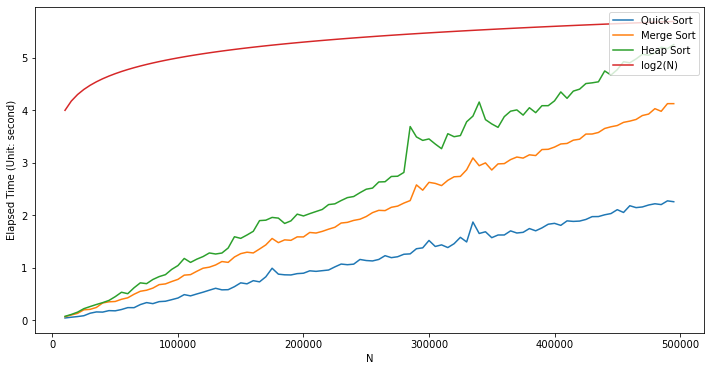

In [100]:
#시간복잡도 측정

plt.plot(saved_data["N"], saved_data["quickSortTimeComplexity"])
plt.plot(saved_data["N"], saved_data["mergeSortTimeComplexity"])
plt.plot(saved_data["N"], saved_data["heapSortTimeComplexity"])
plt.plot(saved_data["N"], time_complexity["N"].apply(lambda x: math.log2(x)))

plt.xlabel("N")
plt.ylabel("Elapsed Time (Unit: second)")
plt.legend(["Quick Sort", "Merge Sort", "Heap Sort", "log2(N)"], loc = "upper right")
plt.rcParams["figure.figsize"] = (12, 6)
plt.show()


plt.show()

In [88]:
saved_data

,N,quickSortTimeComplexity,quickSort_swap,quicksort_comparison,mergeSortTimeComplexity,mergeSort_swap,mergesort_comparison,heapSortTimeComplexity,heapSort_swap,heapsort_comparison
0,10000.0,0.032318,36529.0,40158.0,0.067749,133616.0,120482.0,0.066781,124242.0,235476.0
1,15000.0,0.043851,58130.0,57817.0,0.094556,208616.0,189218.0,0.110302,194747.0,370192.0
2,20000.0,0.059862,81531.0,41196.0,0.124579,287232.0,260834.0,0.146903,268264.0,510676.0
3,25000.0,0.075449,104778.0,89973.0,0.156937,367232.0,334192.0,0.192697,343642.0,654872.0
4,30000.0,0.091410,128431.0,115805.0,0.194636,447232.0,408667.0,0.239075,419909.0,800706.0
...,...,...,...,...,...,...,...,...,...,...
93,475000.0,2.034709,2984534.0,2592227.0,4.045732,8975712.0,8362001.0,5.390966,8540008.0,16462594.0
94,480000.0,2.063890,2997240.0,2772986.0,4.100095,9075712.0,8457138.0,5.378256,8634697.0,16647534.0
95,485000.0,1.958807,3048587.0,2309176.0,4.188958,9175712.0,8551519.0,5.438600,8731240.0,16833060.0
96,490000.0,2.187625,3060402.0,3249775.0,4.226646,9275712.0,8646589.0,5.598560,8828360.0,17020178.0


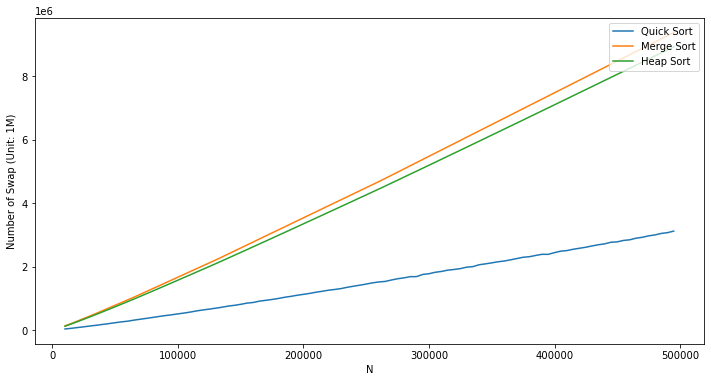

In [103]:
# 교환횟수 비교

plt.plot(saved_data["N"], saved_data["quickSort_swap"])
plt.plot(saved_data["N"], saved_data["mergeSort_swap"])
plt.plot(saved_data["N"], saved_data["heapSort_swap"])

plt.xlabel("N")
plt.ylabel("Number of Swap (Unit: 1M)")
plt.legend(["Quick Sort", "Merge Sort", "Heap Sort"], loc = "upper right")
plt.rcParams["figure.figsize"] = (12, 6)
plt.show()

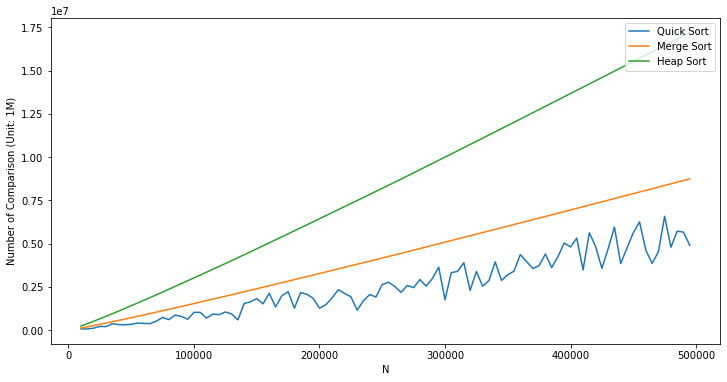

In [99]:
# 비교횟수 비교

plt.plot(time_complexity["N"], saved_data["quicksort_comparison"])
plt.plot(time_complexity["N"], saved_data["mergesort_comparison"])
plt.plot(time_complexity["N"], saved_data["heapsort_comparison"])

plt.xlabel("N")
plt.ylabel("Number of Comparison (Unit: 1M)")
plt.legend(["Quick Sort", "Merge Sort", "Heap Sort"], loc = "upper right")
plt.rcParams["figure.figsize"] = (12, 6)
plt.show()


plt.show()